In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import glob
import os

In [3]:
%matplotlib inline

In [3]:
""" KH """

' KH '

In [ ]:
fs_IS = []
fs_ISCE = []
fs_BDNK = []
#files = sorted(glob.glob('1d/data*hdf5'), key=os.path.getmtime)
#for f in files:
for n in range(11):
    fs_IS.append(h5py.File(f'IS/KH/Ideal/cfl04/dp_400x400x0_{n}.hdf5', 'r'))
    fs_ISCE.append(h5py.File(f'ISCE/KH/Shear/Ideal/cfl04/dp_400x400x0_{n}.hdf5', 'r'))
    fs_BDNK.append(h5py.File(f'BDNK/KH/Shear/Ideal/cfl04/dp_800x800x0_{n}.hdf5', 'r'))

In [4]:
""" Shocktube 1D """

' Shocktube 1D '

In [97]:
fs_IS = []
fs_ISCE = []
fs_BDNK = []
#files = sorted(glob.glob('1d/data*hdf5'), key=os.path.getmtime)
#for f in files:
for n in range(2):
#     fs_IS.append(h5py.File(f'IS/Shocktube1D/Ideal/smol/data_serial_TIx_{n}.hdf5', 'r'))
#     fs_ISCE.append(h5py.File(f'ISCE/Shocktube1D/Ideal/data_serial_TIx_{n}.hdf5', 'r'))
    fs_IS.append(h5py.File(f'IS/Shocktube1D/Bulk/zeta1em3/data_serial_TIx_{n}.hdf5', 'r'))
    fs_ISCE.append(h5py.File(f'ISCE/Shocktube1D/Bulk/data_serial_TIx_{n}.hdf5', 'r'))
#     fs_IS.append(h5py.File(f'IS/Shocktube1D/Heat/data_serial_TIx_{n}.hdf5', 'r'))
#     fs_ISCE.append(h5py.File(f'ISCE/Shocktube1D/Heat/data_serial_TIx_{n}.hdf5', 'r'))
#     fs_IS.append(h5py.File(f'IS/Shocktube1D/Shear/data_serial_TIx_{n}.hdf5', 'r'))
#     fs_ISCE.append(h5py.File(f'ISCE/Shocktube1D/Shear/data_serial_TIx_{n}.hdf5', 'r'))
#     fs_BDNK.append(h5py.File(f'BDNK/Shocktube1D/Ideal/data_serial_{n}.hdf5', 'r'))
    fs_BDNK.append(h5py.File(f'BDNK/Shocktube1D/Bulk/zeta1em3/data_serial_TIx_{n}.hdf5', 'r'))
fss = [fs_IS, fs_ISCE, fs_BDNK]
# names = ['IS Ideal', 'ISCE Ideal', 'BDNK Ideal']
# names = ['IS Shear', 'ISCE Shear']#, 'BDNK Ideal']
names = ['IS Bulk', 'ISCE Bulk', 'BDNK Bulk']
linestyles = ['solid','dashed', 'dashdot']

In [104]:
fs_IS_ID = []
fs_ISCE_ID = []
fs_BDNK_ID = []
#files = sorted(glob.glob('1d/data*hdf5'), key=os.path.getmtime)
#for f in files:
for n in range(6):
    fs_IS_ID.append(h5py.File(f'IS/Shocktube1D/Ideal/smol/data_serial_TIx_{n}.hdf5', 'r'))
    fs_ISCE_ID.append(h5py.File(f'ISCE/Shocktube1D/Ideal/data_serial_TIx_{n}.hdf5', 'r'))
    fs_BDNK_ID.append(h5py.File(f'BDNK/Shocktube1D/Ideal/data_serial_{n}.hdf5', 'r'))
fss_ID = [fs_IS_ID, fs_ISCE_ID, fs_BDNK_ID]
# names = ['IS Ideal', 'ISCE Ideal', 'BDNK Ideal']
# names = ['IS Bulk', 'ISCE Bulk', 'BDNK Bulk']
# linestyles = ['solid','dashed', 'dashdot']

In [82]:
for fs in fss:
    print(f"endtime: {fs[-1].attrs['t']}")
    zeta = fs[0]['Optional'].attrs['zeta'][0]
    kappa = fs[0]['Optional'].attrs['kappa'][0]
    if fs == fs_BDNK:
        eta = fs[0]['Optional'].attrs['eta_0'][0]
    else:
        eta = fs[0]['Optional'].attrs['eta'][0]

    if fs != fs_BDNK:
        tau_Pi = fs[0]['Optional'].attrs['tau_Pi'][0]
        tau_q = fs[0]['Optional'].attrs['tau_q'][0]
        tau_pi = fs[0]['Optional'].attrs['tau_pi'][0]

    print(f"Dissipation strengths: zeta {zeta}, "
          f"kappa: {kappa}, ", f"eta: {eta}, "
      f"relaxation time {tau_pi}, "
      f"timestep {fs[0]['Domain'].attrs['dt'][0]}")

endtime: [0.4]
Dissipation strengths: zeta 0.001, kappa: 1e-15,  eta: 1e-15, relaxation time 0.1, timestep 0.0006250000000000001
endtime: [0.4]
Dissipation strengths: zeta 0.001, kappa: 1e-15,  eta: 1e-15, relaxation time 0.1, timestep 0.0006250000000000001
endtime: [0.4]


KeyError: "Can't open attribute (can't locate attribute: 'eta_0')"

160


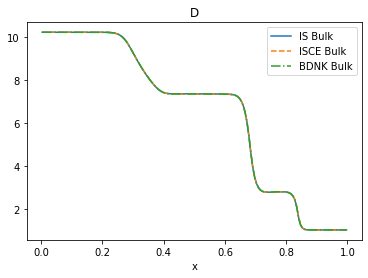

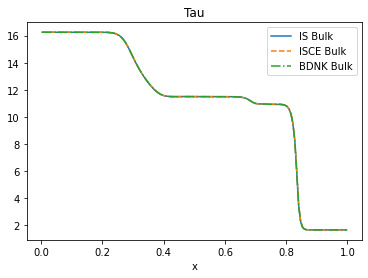

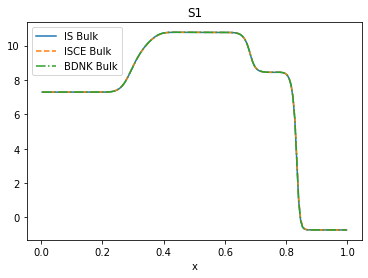

In [127]:
nslice=fs_IS[0]['Domain'].attrs['nx'][0]//5
print(nslice)
for quant in['D','Tau','S1']:
    plt.figure()
    for fs, name, ls in zip(fss, names, linestyles):
        plt.plot(fs[-1]['Domain/x'][:nslice], fs[-1]['Conserved/'+quant][:nslice],label=name,linestyle=ls)
    plt.title(quant)
    plt.xlabel('x')
    plt.legend()
#     plt.savefig("ConfirmationReportPlots/ConsIdeal_"+quant+".pdf")
    plt.savefig("ConfirmationReportPlots/Shocktube/ConsBulk_"+quant+".pdf")
    plt.show()


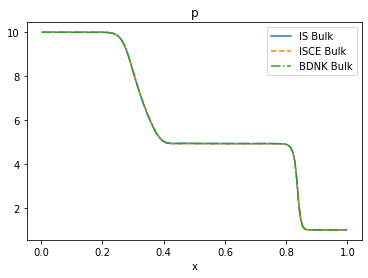

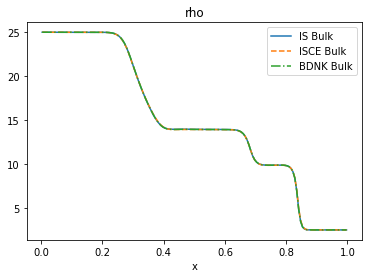

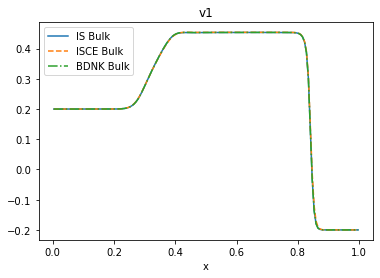

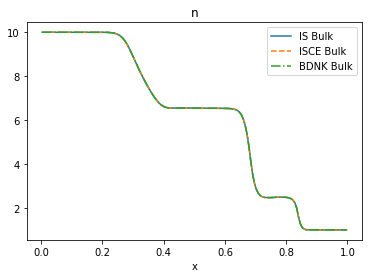

In [128]:
for quant in['p','rho','v1','n']:
    plt.figure()
    for fs, name, ls in zip(fss, names, linestyles):
        plt.plot(fs[-1]['Domain/x'][:nslice], fs[-1]['Primitive/'+quant][:nslice],label=name,linestyle=ls)
    plt.title(quant)
    plt.xlabel('x')
    plt.legend()
#     plt.savefig("ConfirmationReportPlots/PrimsIdeal_"+quant+".pdf")
    plt.savefig("ConfirmationReportPlots/Shocktube/PrimsBulk_"+quant+".pdf")
    plt.show()

In [114]:
5*nslice/2

400.0

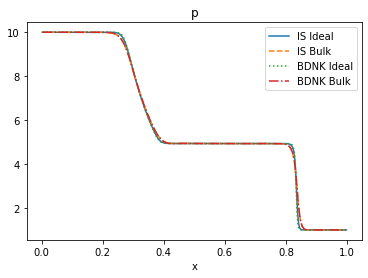

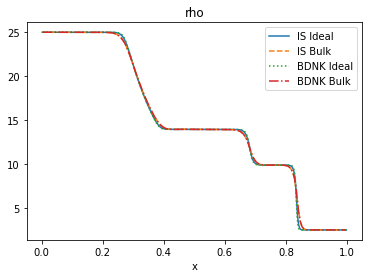

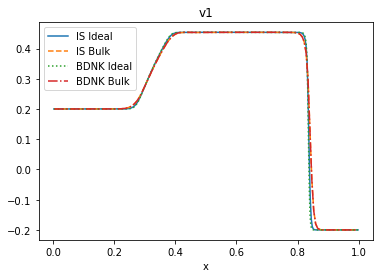

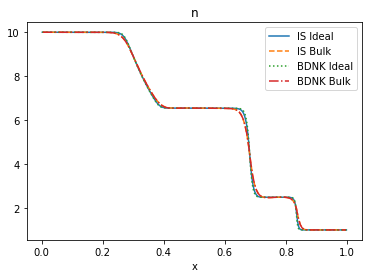

In [126]:
for quant in['p','rho','v1','n']:
    plt.figure()
    plt.plot(fs_IS_ID[-1]['Domain/x'][:2*nslice], fs_IS_ID[-1]['Primitive/'+quant][:2*nslice],label='IS Ideal',linestyle='solid')
    plt.plot(fs_IS[-1]['Domain/x'][:nslice], fs_IS[-1]['Primitive/'+quant][:nslice],label='IS Bulk',linestyle='dashed')
#     plt.plot(fs_ISCE_ID[-1]['Domain/x'][:2*nslice], fs_ISCE_ID[-1]['Primitive/'+quant][:2*nslice],label='ISCE Ideal',linestyle='dotted')
#     plt.plot(fs_ISCE[-1]['Domain/x'][:nslice], fs_ISCE[-1]['Primitive/'+quant][:nslice],label='ISCE Bulk',linestyle='dashdot')
    plt.plot(fs_BDNK_ID[-1]['Domain/x'][:int(2.5*nslice)], fs_BDNK_ID[-1]['Primitive/'+quant][:int(2.5*nslice)],label='BDNK Ideal',linestyle='dotted')
    plt.plot(fs_BDNK[-1]['Domain/x'][:nslice], fs_BDNK[-1]['Primitive/'+quant][:nslice],label='BDNK Bulk',linestyle='dashdot')
    plt.title(quant)
    plt.xlabel('x')
    plt.legend()
    plt.savefig("ConfirmationReportPlots/Shocktube/Prims_ISBDNK_IdVsBulk_"+quant+".pdf")
    plt.show()